In [1]:
!pip install wandb
!pip install category_encoders

     |████████████████████████████████| 1.4MB 9.0MB/s 
     |████████████████████████████████| 102kB 14.0MB/s 
     |████████████████████████████████| 102kB 14.4MB/s 
     |████████████████████████████████| 460kB 57.1MB/s 
     |████████████████████████████████| 102kB 13.7MB/s 
     |████████████████████████████████| 71kB 10.1MB/s 
     |████████████████████████████████| 71kB 10.4MB/s 
  Created wheel for watchdog: filename=watchdog-0.10.1-cp36-none-any.whl size=73501 sha256=9af2d2736f84dde2f16bde08c65ae7cd62618e803bf6fc3ec1a6cebd89d1019b
  Stored in directory: /root/.cache/pip/wheels/d3/07/ac/f8e4e29b1f6df6ed9569891d26a326f2af9ff8b77448cc46b8
  Created wheel for gql: filename=gql-0.2.0-cp36-none-any.whl size=7630 sha256=5f073a80faa4ef9d9a9d2b7c08af3497441c88802a97a3eaa182832925b7261f
  Stored in directory: /root/.cache/pip/wheels/ce/0e/7b/58a8a5268655b3ad74feef5aa97946f0addafb3cbb6bd2da23
  Created wheel for shortuuid: filename=shortuuid-0.5.0-cp36-none-any.whl size=5497 sha256=83d77e

In [4]:
import pandas as pd
import numpy
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import wandb
from wandb.keras import WandbCallback
from category_encoders import TargetEncoder
from category_encoders import OrdinalEncoder
from tensorflow import keras

songs = pd.read_csv('http://www.zernach.com/wp-content/uploads/2020/02/SpotifyAudioFeaturesApril2019.csv')
songs['track_index_num'] = songs.index
print(songs.shape)
songs

(130663, 18)


,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,track_index_num
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.1180,15,0
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.3710,0,1
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.3820,56,2
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.6410,0,3
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.9280,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130658,Calum Scott,0cvfSKcm9VeduwyYPrxtLx,Come Back Home,0.006780,0.601,190539,0.801,0.000,11,0.0991,-5.174,1,0.0323,131.049,4,0.2890,57,130658
130659,Saint Claire,43MP9F7UzvfilSrw2SqZGJ,Enough for You,0.918000,0.387,194583,0.249,0.000,9,0.1030,-13.233,1,0.0437,94.039,4,0.3460,60,130659
130660,Mike Stud,4TWlUuFk81NGUNKwndyS5Q,Do It,0.330000,0.717,139191,0.532,0.000,8,0.0997,-8.351,0,0.2060,156.977,4,0.5460,47,130660
130661,D Savage,5iGBXzOoRo4sBTy8wdzMyK,No Smoke,0.007900,0.772,180013,0.510,0.000,4,0.1310,-9.670,0,0.1200,120.049,4,0.0755,50,130661


In [5]:
songs100 = pd.read_csv('http://www.zernach.com/wp-content/uploads/2020/02/songs100.csv')
songs100

,Unnamed: 0,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,track_index_num,album_cover_url
0,0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.1180,15,0,https://i.scdn.co/image/ab67616d00001e022732f5...
1,1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.3710,0,1,https://i.scdn.co/image/ab67616d00001e022a90f8...
2,2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.3820,56,2,https://i.scdn.co/image/ab67616d00001e027e4890...
3,3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.6410,0,3,https://i.scdn.co/image/ab67616d00001e02bd7b27...
4,4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.9280,0,4,https://i.scdn.co/image/ab67616d00001e02ee8d58...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,Armin van Buuren,4b015GCZ0TsIGAx5NpDs7I,"A State Of Trance (ASOT 874) - Coming Up, Pt. 1",0.019800,0.460,31224,0.662,0.000,2,0.2990,-10.579,1,0.3330,132.468,4,0.7060,16,95,https://i.scdn.co/image/ab67616d00001e0298f2fc...
96,96,Armin van Buuren,38OiUD6l3Tm1jgSLGC9GNH,A State Of Trance (ASOT 874) - Interview with ...,0.236000,0.657,31110,0.471,0.000,9,0.8620,-10.784,1,0.4040,77.584,3,0.8670,12,96,https://i.scdn.co/image/ab67616d00001e0298f2fc...
97,97,Hamzeh,5BCnkUBpOza5RMvAc7hhhW,Frostbite (ASOT 874),0.007760,0.433,176070,0.787,0.883,8,0.3900,-11.765,1,0.0378,133.515,4,0.2140,14,97,https://i.scdn.co/image/ab67616d00001e0298f2fc...
98,98,MaRLo,6d4kE5Kz6ZD4XNrItzdG2m,Haunted (ASOT 874) - Avao Remix,0.000977,0.499,243540,0.722,0.515,7,0.3310,-11.550,1,0.0429,136.174,4,0.0844,17,98,https://i.scdn.co/image/ab67616d00001e0298f2fc...


In [0]:
target = 'track_index_num'
features = songs100.drop(columns=[target, 'artist_name', 'track_name', 'track_id', 'album_cover_url']).columns

#train, test = train_test_split(songs, train_size=0.01, test_size=0.99, random_state=42)

#x_train = songs[features] 
x_train_100 = songs100[features]
y_train = songs100[target]
y_train_100 = songs100[target]
#x_test = test[features]
#y_test = test[target]

#encoder = OrdinalEncoder()
#encoder.fit(x_train, y_train)
#x_train_encoded = encoder.transform(x_train)
#x_test_encoded = encoder.transform(x_test)

In [43]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=100, algorithm='kd_tree')
nn.fit(x_train_100)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                 radius=1.0)

In [0]:
from joblib import dump
dump(nn, 'nn100.joblib', compress=1)

In [11]:
songs[songs['artist_name'] == 'Coldplay']

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,track_index_num
3522,Coldplay,5HbZRiMNwwoU2ccEOxij6N,We All Fall In Love Sometimes,0.973000,0.370,239906,0.0821,0.001240,5,0.116,-16.098,0,0.0338,90.765,3,0.1510,52,3522
120909,Coldplay,314gi4w3RdZxlocdWw0Khr,Paradise - Live In Buenos Aires,0.001930,0.189,419373,0.8720,0.018700,5,0.898,-6.616,1,0.0510,138.661,4,0.1900,62,120909
120927,Coldplay,4Q0yfgpERfkp59Pf2tdI4q,Every Teardrop Is A Waterfall - Live In Buenos...,0.004060,0.397,244307,0.9430,0.000000,9,0.981,-5.619,1,0.0663,118.005,4,0.3250,63,120927
120932,Coldplay,7mGJlNOAOmJ5ptkmujg1Gv,Fix You - Live In Buenos Aires,0.005340,0.256,327467,0.6250,0.003860,3,0.179,-7.530,1,0.0348,140.351,4,0.2010,62,120932
120935,Coldplay,2q8WO601qIwLwV4DgXDCiO,God Put A Smile Upon Your Face - Live In Bueno...,0.000615,0.345,274053,0.9670,0.000117,1,0.890,-4.687,0,0.0837,137.917,4,0.3660,62,120935
120936,Coldplay,6EqxH0njjZuuI3gFZN3Z1o,Magic - Live In Buenos Aires,0.016200,0.474,285840,0.8360,0.381000,9,0.748,-6.547,1,0.0618,95.544,4,0.4790,61,120936
120937,Coldplay,4Y9lVjRD82aJOQ2v13UIoF,Viva La Vida - Live In Buenos Aires,0.005370,0.428,251067,0.9480,0.000001,5,0.371,-4.655,0,0.0934,138.015,4,0.2190,62,120937
120938,Coldplay,4cHZ7W5R81upaIGZfqWxbB,Clocks - Live In Buenos Aires,0.065000,0.448,260200,0.9070,0.012500,5,0.391,-5.253,0,0.0531,130.898,4,0.2300,61,120938
120939,Coldplay,4U5Cr41d1K6s48GAndvCdM,Everglow - Live In Buenos Aires,0.711000,0.292,295373,0.4340,0.000205,4,0.383,-8.881,1,0.0330,154.040,4,0.2340,61,120939
120940,Coldplay,0oAchaVoTWj6lXTR6f2dSU,Always In My Head - Live In Buenos Aires,0.001570,0.460,221200,0.7710,0.827000,5,0.975,-7.872,1,0.0314,97.555,3,0.1470,60,120940


In [12]:
viva = songs[songs['track_index_num'] == 120937]
viva = viva.drop(['artist_name', 'track_id', 'track_name', target], axis=1)
viva

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
120937,0.00537,0.428,251067,0.948,0.000001,5,0.371,-4.655,0,0.0934,138.015,4,0.219,62


In [18]:
Big_B= songs100[songs100['track_index_num'] == 0]
#= songs[songs['track_index_num'] == 120937]
Big_B = Big_B.drop(['artist_name', 'track_id', 'track_name','album_cover_url', target], axis=1)
Big_B

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,0,0.00582,0.743,238373,0.339,0.0,1,0.0812,-7.678,1,0.409,203.927,4,0.118,15


In [0]:
#help(nn.kneighbors)

In [45]:
preds = nn.kneighbors(Big_B)
preds

(array([[     0.        ,    823.33997073,   2789.88888713,
           5168.37877196,   7223.41221343,   7337.72078961,
           9040.58891917,  11133.60994306,  11467.88648036,
          13327.47997555,  13777.47700869,  15373.18474499,
          15749.24214813,  19882.39516655,  20907.23839833,
          21002.22798361,  21413.26355433,  22506.2592624 ,
          23573.04863544,  27069.38029828,  28368.29241526,
          35803.16308325,  38205.14077695,  38725.13178391,
          39820.22762419,  42623.15015147,  46443.13498498,
          46593.12612583,  48906.08240645,  51807.15136509,
          52404.10031222,  53827.17219531,  54243.09387156,
          56535.03699635,  60437.11336833,  62303.11584401,
          66129.07671499,  66990.08913902,  67373.03287876,
          70373.12547903,  70453.05790587,  85718.05460239,
          86473.0595048 ,  90357.04566012,  90357.04673855,
          94373.05746004,  99460.04860056, 101194.05176057,
         103604.03434262, 103604.0346489

In [46]:
preds[1].T

array([[ 0],
       [72],
       [50],
       [98],
       [57],
       [73],
       [51],
       [90],
       [53],
       [87],
       [93],
       [59],
       [41],
       [56],
       [48],
       [55],
       [74],
       [64],
       [ 1],
       [61],
       [54],
       [76],
       [60],
       [69],
       [63],
       [85],
       [84],
       [77],
       [42],
       [47],
       [58],
       [46],
       [66],
       [ 7],
       [92],
       [97],
       [70],
       [49],
       [44],
       [45],
       [62],
       [67],
       [71],
       [30],
       [33],
       [78],
       [ 2],
       [94],
       [13],
       [15],
       [18],
       [21],
       [20],
       [86],
       [ 6],
       [ 9],
       [12],
       [26],
       [43],
       [25],
       [11],
       [23],
       [17],
       [40],
       [ 3],
       [24],
       [29],
       [31],
       [39],
       [38],
       [ 4],
       [ 5],
       [ 8],
       [10],
       [14],
       [16],
       [19],

In [21]:
 from sklearn.neighbors import kneighbors_graph
 A = kneighbors_graph(preds[1].T,n_neighbors=5, mode='connectivity', include_self=True)
 A.toarray()


array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [39]:
y = y_train_100.values
y

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [0]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
import time
import matplotlib.pyplot as plt
 

In [0]:
# Generate sample data
import numpy as np

n_samples = 1500
np.random.seed(0)
t = 1.5 * np.pi * (1 + 3 * np.random.rand(1, n_samples))
x = t * np.cos(t)
y = t * np.sin(t)


X = np.concatenate((x, y))
X += .7 * np.random.randn(2, n_samples)
X = X.T

In [30]:
X = x_train_100.values
X

array([[0.00e+00, 5.82e-03, 7.43e-01, ..., 4.00e+00, 1.18e-01, 1.50e+01],
       [1.00e+00, 2.44e-02, 8.46e-01, ..., 4.00e+00, 3.71e-01, 0.00e+00],
       [2.00e+00, 2.50e-02, 6.03e-01, ..., 4.00e+00, 3.82e-01, 5.60e+01],
       ...,
       [9.70e+01, 7.76e-03, 4.33e-01, ..., 4.00e+00, 2.14e-01, 1.40e+01],
       [9.80e+01, 9.77e-04, 4.99e-01, ..., 4.00e+00, 8.44e-02, 1.70e+01],
       [9.90e+01, 2.76e-03, 2.91e-01, ..., 1.00e+00, 3.41e-01, 1.70e+01]])

In [0]:
from sklearn.decomposition import PCA

pca = PCA(2)
new_data = pca.fit_transform(X)

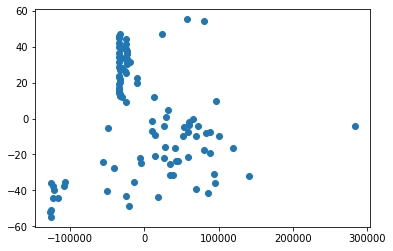

In [32]:
plt.scatter(new_data[:,0], new_data[:,1])

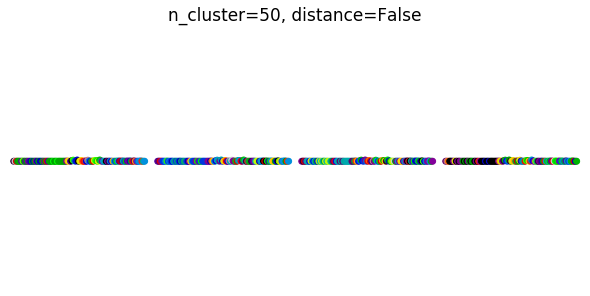

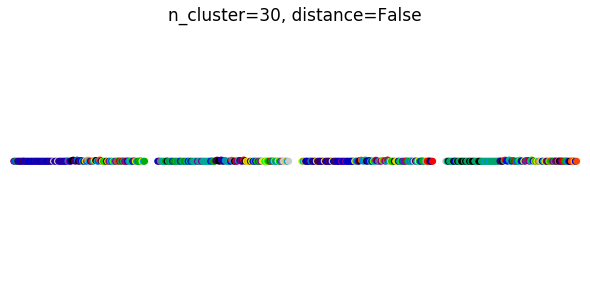

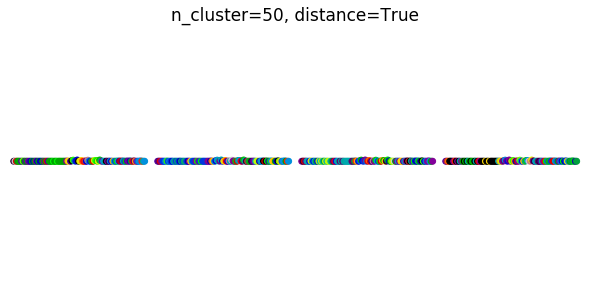

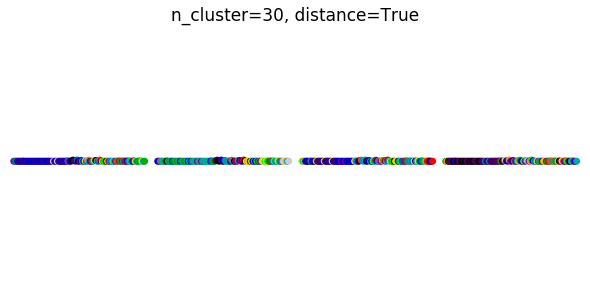

In [59]:


# Generate sample data
#n_samples = 1500
#np.random.seed(0)
#t = 1.5 * np.pi * (1 + 3 * np.random.rand(1, n_samples))
#x = t * np.cos(t)
#y = t * np.sin(t)


#X = np.concatenate((x, y))
#X += .7 * np.random.randn(2, n_samples)
#X = X.T

# Create a graph capturing local connectivity. Larger number of neighbors
# will give more homogeneous clusters to the cost of computation
# time. A very large number of neighbors gives more evenly distributed
# cluster sizes, but may not impose the local manifold structure of
# the data
knn_graph = kneighbors_graph(preds[1].T, 100,mode='connectivity', include_self=True)

for connectivity in (None, knn_graph):
    for n_clusters in (50, 30):
        plt.figure(figsize=(8, 4))
        for index, linkage in enumerate(('average',
                                         'complete',
                                         'ward',
                                         'single')):
            plt.subplot(1, 4, index + 1)
            model = AgglomerativeClustering(linkage=linkage,
                                            connectivity=connectivity,
                                            n_clusters=n_clusters)
            t0 = time.time()
            model.fit(X)
            elapsed_time = time.time() - t0
            plt.scatter(X[:, 0], X[:, 1], c=model.labels_,
                        cmap=plt.cm.nipy_spectral)
            #plt.title('linkage=%s\n(time %.2fs)' % (linkage, elapsed_time),
                    #  fontdict=dict(verticalalignment='top'))
            plt.axis('equal')
            plt.axis('off')

            plt.subplots_adjust(bottom=0, top=.89, wspace=0,
                                left=0, right=1)
            plt.suptitle('n_cluster=%i, distance=%r' %
                         (n_clusters, connectivity is not None), size=17)


plt.show()


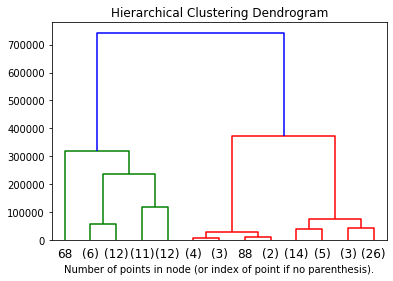

In [60]:

#from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
#from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


#iris = load_iris()
#X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [61]:
preds

(array([[     0.        ,    823.33997073,   2789.88888713,
           5168.37877196,   7223.41221343,   7337.72078961,
           9040.58891917,  11133.60994306,  11467.88648036,
          13327.47997555,  13777.47700869,  15373.18474499,
          15749.24214813,  19882.39516655,  20907.23839833,
          21002.22798361,  21413.26355433,  22506.2592624 ,
          23573.04863544,  27069.38029828,  28368.29241526,
          35803.16308325,  38205.14077695,  38725.13178391,
          39820.22762419,  42623.15015147,  46443.13498498,
          46593.12612583,  48906.08240645,  51807.15136509,
          52404.10031222,  53827.17219531,  54243.09387156,
          56535.03699635,  60437.11336833,  62303.11584401,
          66129.07671499,  66990.08913902,  67373.03287876,
          70373.12547903,  70453.05790587,  85718.05460239,
          86473.0595048 ,  90357.04566012,  90357.04673855,
          94373.05746004,  99460.04860056, 101194.05176057,
         103604.03434262, 103604.0346489